In [1]:
import sklearn as sk
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sklearn as sk

#  I-  Régression 

la taille de notre échantillon est : (50,)
la taille de notre échantillon est : (50,)


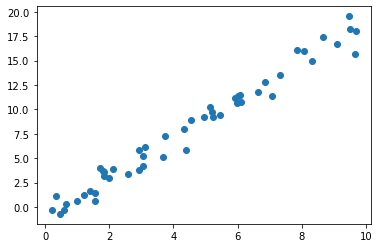

In [3]:
#un exemple simple en deux dimensions

rng = np.random.RandomState(42) #pour générer les mêmes données

#constituer  un exmple de data 
x = 10 * rng.rand(50) 
print('la taille de notre échantillon est :',x.shape)

y=2*x-1 + rng.randn(x.shape[0]) # c'est un bruit de loi ? 
print('la taille de notre échantillon est :',y.shape)
#afficher data y=f(x) [y en fonction de x]  comme un nuage de points 

plt.scatter(x, y);
plt.show()

## Y-a-t-il une relation entre $x$ et $y$ : trouver $f$ tel que  y=f(x) ? (Cours 1)

Pour répondre à cette question, nous allons supposer que $f$ est une fonction de la forme $f(x)=a*x+b$ avec $a$ et $b$ sont des réels à déterminer. 

Input : $(x_i,y_i),$ pour  $i=1\ldots 50$

on a $y_i=a*x_i + b + \epsilon_i,$ pour  $i=1\ldots 50$ 

qui forme un système linéaire facile à résoudre (plus de données que d'inconnus)

### Formulation (cours semaine 1)

In [4]:
# On peut résoudre ce problème de régression linéaire avec sklearn 

# on choisit et charge le modèle 
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
print('la tailles des entrées est :',X.shape)

models = LinearRegression(fit_intercept=True) #fit_intercept=True car on suppose b!=0
models.fit(X, y)

la tailles des entrées est : (50, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
a=models.coef_
print('-'*5,'la solution','-'*5)
print('la valeur trouvée de a est : ', a[0])

b=models.intercept_
print('la valeur trouvée de b est : ', b)

----- la solution -----
la valeur trouvée de a est :  1.9776566003853107
la valeur trouvée de b est :  -0.9033107255311146


Si maintenat on a un nouveau $xnew=2.5$ qui est différent de tous les $x_i$ observés 

On peut trouver son image $ynew$ avec $ynew=a*xnew+b$ 

In [6]:
xnew=np.array([2.50])
ynew = models.predict(xnew.reshape(-1, 1))
print(ynew)

[4.04083078]


On peut aussi appliquer la même méthode sur xnew comme tableau de valeurs
au lieu d'un seul scalaire 

In [7]:
xnew=np.linspace(-1,10,5)
#s'assurer d'avoir le bon format 
xnew=xnew[:, np.newaxis]

ynew = models.predict(xnew)
print(ynew)

[-2.88096733  2.55758833  7.99614398 13.43469963 18.87325528]


Vérification visuelle

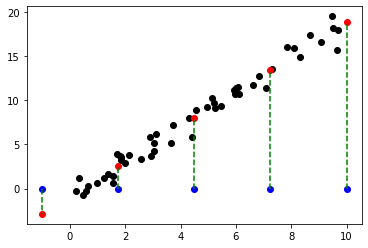

In [8]:
xnew=np.linspace(-1,10,5)
plt.scatter(x, y,color='k');# données training en noir 
plt.scatter(xnew, np.zeros(xnew.shape[0]),color='b');# x_i non observés en bleu
plt.scatter(xnew, ynew,color='r');# y_i prédit en rouge 
for i in range(xnew.size): 
    plt.plot([xnew[i],xnew[i]], [0, ynew[i]], 'g--')

Erreur quadratique moyenne :  0.8230711437486881
Le cofficient d'ajustement est :  [1.9776566]
*************************
Mean squared error: 0.82
Coefficient ajustement  : 0.97


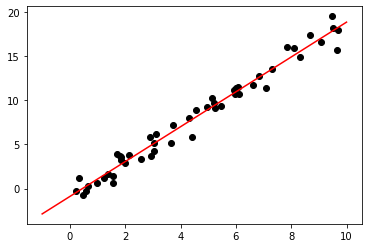

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
#on peut aussi afficher la fonction f
plt.scatter(x, y,color='k');
#plt.scatter(xnew, ynew);
plt.plot(xnew, ynew,'r');
#l'erreur est donnée par la somme cumulée des distances 
#entre les points en noir et la droite en rouge

ypred=models.predict(X)
#print("La taille de ypred est : ", ypred.shape, 'et la taille de X est', X.shape)
print('Erreur quadratique moyenne : ',np.mean((y-ypred)**2))
print("Le cofficient d'ajustement est : ", models.coef_)

# En utuilsant les méthodes sklearn 
# The mean squared error (MSE) erreur quadratique moyenne
print(25*"*")
print("Mean squared error: %.2f" % mean_squared_error(y, ypred))
# Ajustement : the coefficient of determination with  1 is perfect
print("Coefficient ajustement  : %.2f" % r2_score(y, ypred))

## Nous venons de faire notre premier exemple pour le cas simple $ x\in \mathbb{R}$ et  $y \in \mathbb{R}$   


On peut généraliser ce résultat quelque soit la taille de $x :  x\in \mathbb{R}^d$, pour toute dimension $d$ mais pas de visualisation possible pour $d \ge 4$

Exemple pour $d=3$: 

On a généré 100  observations (x_i, y_i) de dimension :  2


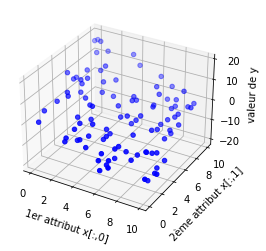

In [10]:
from mpl_toolkits.mplot3d import Axes3D
#constituer  un exmple de data 
nobservs=100
interval=10
x = np.array(interval * rng.rand(nobservs,2))
print('On a généré', nobservs, ' observations (x_i, y_i) de dimension : ', x.shape[1])
y=2*np.inner(np.array([-1,1]), x)+ 2*rng.randn(x.shape[0]) # on ajoute du bruit (Gaussian noise) 

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1],y,c='b', marker='o');
ax.set_xlabel('1er attribut x[:,0]')
ax.set_ylabel('2ème attribut x[:,1]')
ax.set_zlabel('valeur de y')

plt.show()

In [12]:
#apprentissage du modèle 
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Nouvelles données 
xnew = np.array(10 * rng.rand(1000,2))
ynew = model.predict(xnew)

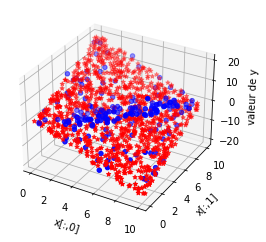

In [14]:

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1],y,c='b', marker='o');
ax.scatter(x[:,0], x[:,1],-y,c='b', marker='o');
ax.set_xlabel('x[:,0]')
ax.set_ylabel('x[:,1]')
ax.set_zlabel('valeur de y ')

ax.scatter(xnew[:,0], xnew[:,1],ynew,c='r', marker='*');

plt.show()

In [15]:
# régression avec statsmodels et d'autres modèles statistiques 
import statsmodels.api as sm

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [16]:
x = sm.add_constant(x)
print(x, ' \n avec une taille : \n', x.shape)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]  
 avec une taille : 
 (8, 3)


In [17]:
mod = sm.OLS(y, x)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 22 Jan 2024   Prob (F-statistic):            0.00713
Time:                        10:25:53   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/limos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
#utiliser le modèle pour la prédiction 
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
y_new = results.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Bien que nous pouvons nous contenter d'un modèle linéaire dans un premier temps, il est bon à savoir que d'autres modèles existent. 

## Règle d'or : on choisit selon l'application !! 

On retient que : 
- Le modèle dans sklearn est facile à comprendre et à implimenter 
- Statsmodels offre des outils statistiques plus avancés

# Un test de la régression linéaire sur des données réelles 


Dans cette partie nous allons découvrir comment on peut utiliser python, numpy, matplotlib et sklearn pour classer des fleurs. 

##### Le dataset (jeu de données) est une base de données des caractéristiques de trois espèces de fleurs d’Iris (Setosa, Versicolour et Virginica). 

Description :
    
    - chaque ligne  est une observation des caractéristiques d’une fleur d’Iris ; 
    - caractéristiques : longueur et largeur pour chaque sépale et pétale (4=2x2);
    - dans cet exemple, le dataset continet $N=150$ observations et $3$ classes(50 observations par espèce) ;
    - plus d'information https://fr.wikipedia.org/wiki/Iris_de_Fisher .
    
   <img src="iris-flower.jpg" alt="Un exemple de donnée" width="200" height="200" style="border:5px solid black">
   <img src="Petal-sepal.jpg" alt="sépale et népale" width="200" height="200" style="border:5px solid black">


In [19]:
#importer les bibliothèques 

#pour l'affichage (si déjà fait pour np, plt) 
%matplotlib inline 

#des datastes dans sklearn pour les tests
from sklearn import datasets

In [21]:
#charger la base qui existe déjà dans sklearn 
iris = datasets.load_iris()
#vérifier le type de la variable iris 
print(type(iris))
#vérifier quel est le type de données 
print(type(iris.data))
#vérifier les dimensions 
print(iris.data.shape)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(150, 4)


## Le choix des variables

In [23]:
X = iris.data[:, :2] # Utiliser les deux premières colonnes seulement pour une exploration visuelle.

print(np.unique(iris.target))
#on va garder deux classes seulement pour un test simple
y = (iris.target != 0) * 1 # re-étiquetage des fleurs : classe 0 (Setosa) et 1=autre (Versicolour et Virginica)
print(X.shape)
print(np.unique(y))

[0 1 2]
(150, 2)
[0 1]


### Pour mieux comprendre notre data, on va visualiser des exemples 

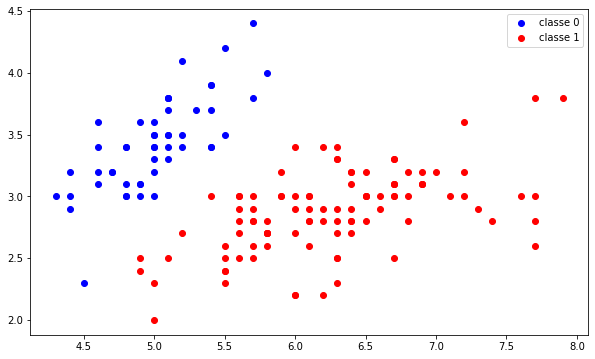

In [24]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='classe 1')
plt.legend();

Une petite vérification visuelle montre que les deux classes peuvtn être séparées par une droite. On dira que elles peuvent être **linéairement** séparées. 

### Pour la suite on va utiliser une régression logistique pour exploiter cette séparation. 

In [25]:
#charger le modèle 
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression(C=1e20) #  Régression logistique
# Entrainement du modèle avec toutes les données 
model.fit(X, y) 

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
Xnew = np.array([
    [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]
])

In [27]:
model.predict(Xnew)

array([1, 1, 0, 0])

Analyse des résultats : 

    * La première observation [5.5, 2.5] est de classe 1
    * La deuxième observation [7, 3] est de classe 1
    * La troisième observation [3,2] est de classe 0
    * La quatrième observation [5,3] est de classe 0

(4,)


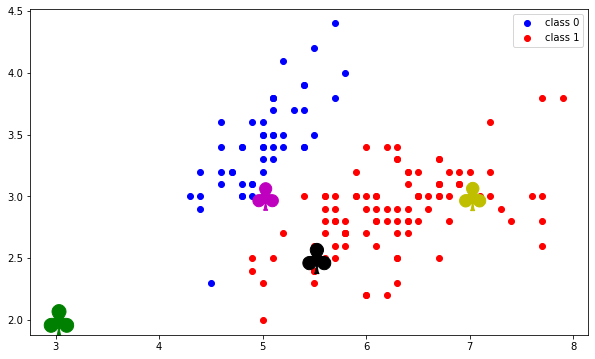

In [28]:
#vérification visuelle ,,,

#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='class 1')

s = np.random.rand(*Xnew[:, 0].shape) * 800 + 500
print(s.shape)
Color='kygm' #noir jaune vert magneta
for i in range(Xnew.shape[0]):
    plt.scatter(Xnew[i, 0], Xnew[i, 1],s[i], color=Color[i],marker=r'$\clubsuit$',)
plt.legend();

## Vérification avec des métriques de qualité 

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = iris.data[:, :2] # Utiliser les deux premières colonnes seulement pour une exploration visuelle.
#on va garder deux classes seulement pour un test simple
y = (iris.target != 0) * 1 # re-étiquetage des fleurs : classe 0 (Setosa) et 1=autre (Versicolour et Virginica)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(C=1e20) #  Régression logistique
# Entrainement du modèle avec seulement les données d'apprentissage cette fois
model.fit(X_train, y_train) 

y_pred = model.predict(X_test) #  Prédiction avec les données de test
accuracy = accuracy_score(y_test, y_pred, normalize=True)

print("L'accuracy est: ", accuracy)

L'accuracy est:  0.9666666666666667


# II-  Classification

In [30]:
# classification d'images de chiffres 
from sklearn.datasets import load_digits 

digits = load_digits()
digits.images.shape


(1797, 8, 8)

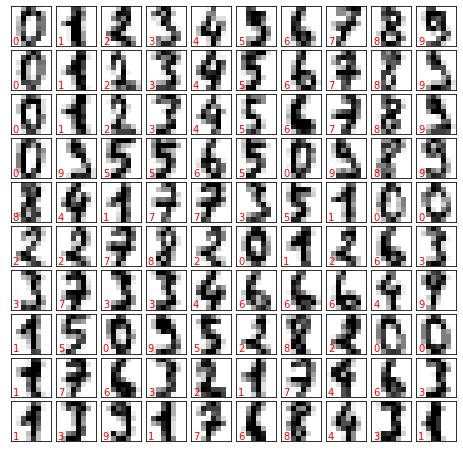

In [31]:
#visualiser les données 
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                     subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='red')

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

## Préparation pour l'apprentissage : train et test 

In [34]:
#former les bases d'apprentissage et de test 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.20, random_state=10)

In [35]:
print(Xtrain.shape)
print(Xtest.shape)
print('pourcentage:' ,Xtrain.shape[0]/X.shape[0])

print(ytrain.shape)

(1437, 64)
(360, 64)
pourcentage: 0.7996661101836394
(1437,)


### Classification avec l'arbre de décision

In [36]:
from sklearn.tree import DecisionTreeClassifier

Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
clf = Arbre_decision.fit(Xtrain, ytrain)

In [37]:
from sklearn.metrics import accuracy_score
ypredit = clf.predict(Xtest)

accuracy_score(ytest, ypredit)

0.8527777777777777

In [38]:
from sklearn import  metrics
print(metrics.confusion_matrix(ytest, ypredit))

[[34  0  0  0  1  0  0  0  1  1]
 [ 0 29  2  1  0  0  0  0  2  0]
 [ 0  2 29  1  0  0  0  0  2  0]
 [ 0  0  1 36  0  0  0  0  1  2]
 [ 0  0  0  0 27  1  2  1  1  2]
 [ 0  0  0  1  0 29  0  1  0  1]
 [ 0  0  0  0  2  1 34  0  0  0]
 [ 0  0  0  0  5  0  0 35  0  0]
 [ 0  1  2  2  1  0  0  1 24  2]
 [ 0  1  1  2  2  1  0  0  2 30]]


### Classification avec le plus proche voisin

In [39]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
clf = KNN .fit(Xtrain, ytrain)

ypredit = clf.predict(Xtest)

accuracy_score(ytest, ypredit)

/Users/limos/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:187: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9861111111111112

In [40]:
print(metrics.confusion_matrix(ytest, ypredit))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  1  0  0  0  0 31  0]
 [ 0  0  0  0  0  1  0  0  1 37]]


### Classification avec SVM

In [41]:
from sklearn import  svm

clf = svm.SVC(gamma=0.001)
clf.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
from sklearn.metrics import accuracy_score
ypredit = clf.predict(Xtest)
accuracy_score(ytest, ypredit)

0.9916666666666667

In [43]:
ypredit = clf.predict(Xtest)
print(metrics.confusion_matrix(ytest, ypredit))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  1 38]]


# ****************** Pratique avec le dataset Titanic (le prochain TP)

In [44]:
import pandas as pd

df=pd.read_csv('./titanic/train.csv')

In [45]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.shape

(891, 12)

In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### La signification des colonnes : 

PassengerID : identifiant

Survived : 0 si ce passager n'a pas survécu, 1 sinon 

Pclass : la classe (1, 2 ou 3)

Name : le nom du passager

Sex : femme ou homme (sexe)

Age : l'âge (en années)

SibSp : le nombre de frère, soeur et/ou épouse à bord

Parch : le nombre de parent et/ou d'enfant à bord

Ticket : numéro du ticket

Fare : prix du billet

Cabin : numéro de cabine

Embarked : port d'embarquement(C = Cherbourg, Q = Queenstown, S = Southampton)